In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# FAST

Number of Keypoints Detected In The Image With Non Max Suppression:  1752
Number of Keypoints Detected In The Image Without Non Max Suppression:  7881
Percentage Matched Between The Training Image And Test Image With Same Object:  14.212328767123289
Percentage Matched Between The Training Image And Test Image With Different Object:  59.589041095890416
Number of Keypoints Detected In The Test Image With Same Object:  7671
Number of Keypoints Detected In The Test Image With Different Object:  38036


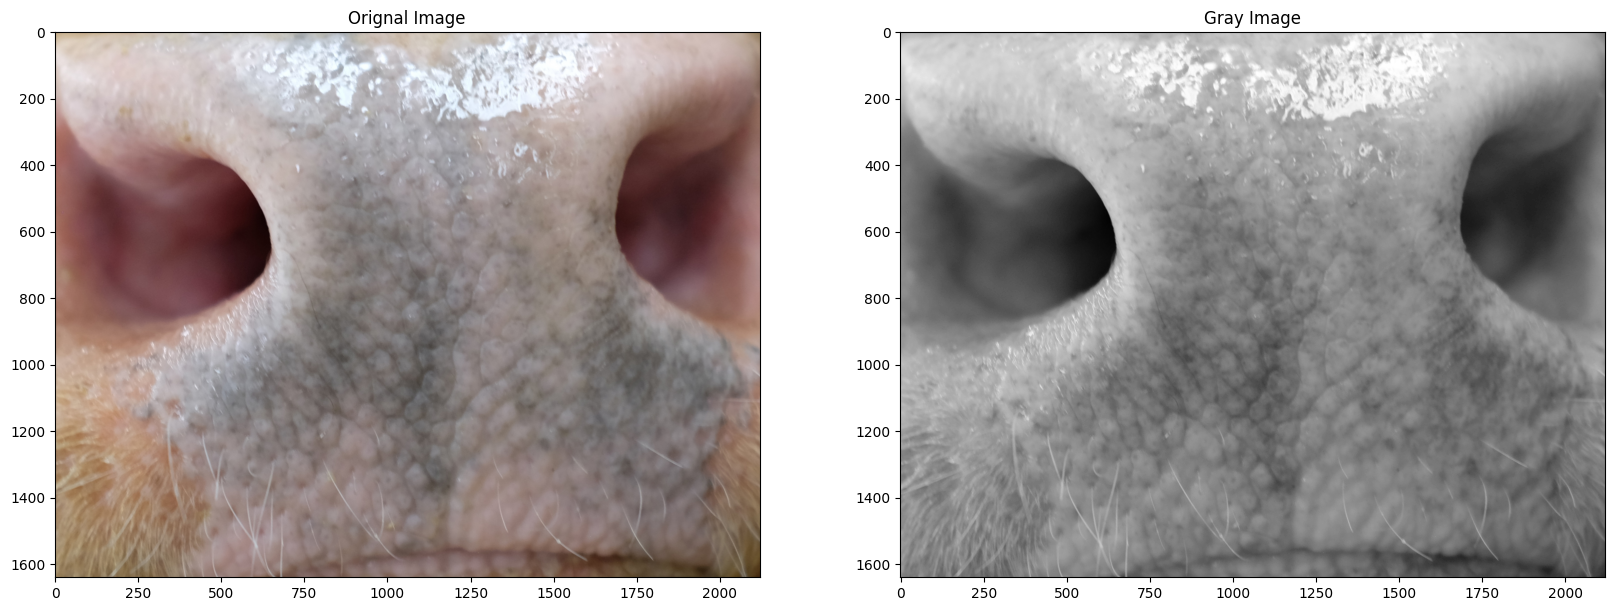

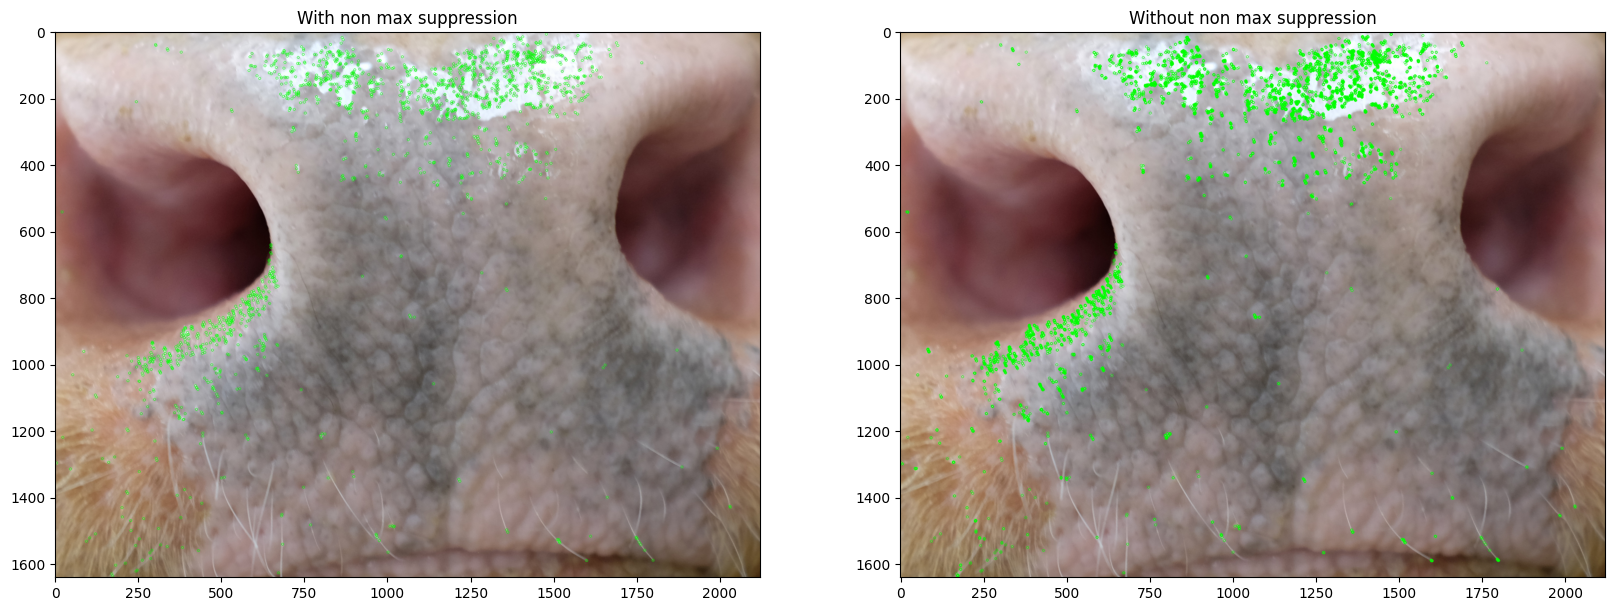

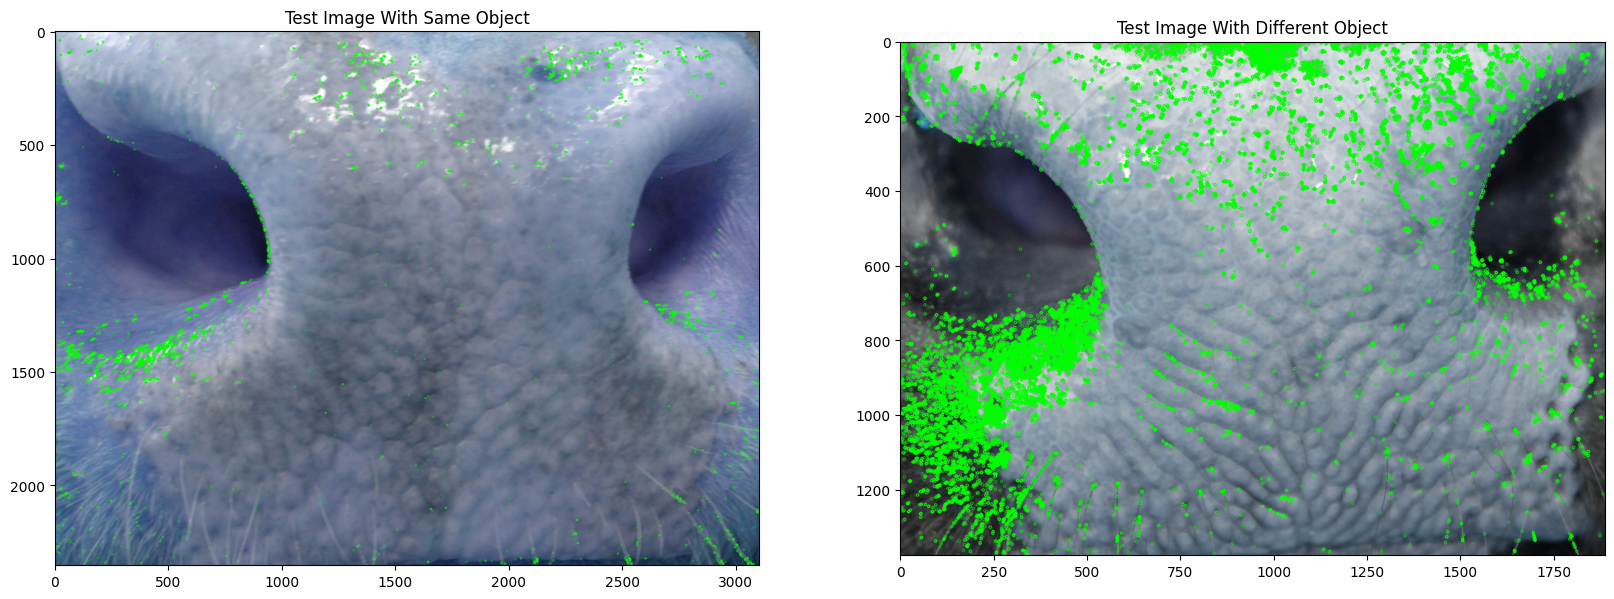

In [90]:
# Load the image
image1 = cv2.imread('./tests/cattle_0600_DSCF3920.jpg')

# Convert  image to RGB
image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert image to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Display image and gray image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Orignal Image")
plots[0].imshow(image)

plots[1].set_title("Gray Image")
plots[1].imshow(gray, cmap="gray")

fast = cv2.FastFeatureDetector_create() 

# Detect keypoints with non max suppression
keypoints_with_nonmax = fast.detect(gray, None)

# Disable nonmaxSuppression 
fast.setNonmaxSuppression(False)

# Detect keypoints without non max suppression
keypoints_without_nonmax = fast.detect(gray, None)

image_with_nonmax = np.copy(image)
image_without_nonmax = np.copy(image)

# Draw keypoints on top of the input image
cv2.drawKeypoints(image, keypoints_with_nonmax, image_with_nonmax, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(image, keypoints_without_nonmax, image_without_nonmax, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without non max suppression
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("With non max suppression")
plots[0].imshow(image_with_nonmax)

plots[1].set_title("Without non max suppression")
plots[1].imshow(image_without_nonmax)

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Image With Non Max Suppression: ", len(keypoints_with_nonmax))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Image Without Non Max Suppression: ", len(keypoints_without_nonmax))

# Load test image with same object
image2 = cv2.imread('./tests/cattle_0600_DJI_0147.jpg')

# Load test image with different object
image3 = cv2.imread('./tests/cattle_0800_DSCF3944.jpg')

# Test image with same object
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)
keypoints2 = fast.detect(gray_image2, None)
image_with_same_object = np.copy(image2)
cv2.drawKeypoints(image2, keypoints2, image_with_same_object, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Test image with different object
gray_image3 = cv2.cvtColor(image3, cv2.COLOR_RGB2GRAY)
keypoints3 = fast.detect(gray_image3, None)
image_with_different_object = np.copy(image3)
cv2.drawKeypoints(image3, keypoints3, image_with_different_object, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display test image with same object and test image with different object
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Test Image With Same Object")
plots[0].imshow(image_with_same_object)

plots[1].set_title("Test Image With Different Object")
plots[1].imshow(image_with_different_object)

# Print the percentage of keypoints matched between the training and test images
matches = 0
for train_keypoint in keypoints_with_nonmax:
    for test_keypoint in keypoints2:
        if abs(train_keypoint.pt[0] - test_keypoint.pt[0]) < 10 and abs(train_keypoint.pt[1] - test_keypoint.pt[1]) < 10:
            matches += 1
            break
        
percentage_matched = (matches / len(keypoints_with_nonmax)) * 100
print("Percentage Matched Between The Training Image And Test Image With Same Object: ", percentage_matched)

matches = 0
for train_keypoint in keypoints_with_nonmax:
    for test_keypoint in keypoints3:
        if abs(train_keypoint.pt[0] - test_keypoint.pt[0]) < 10 and abs(train_keypoint.pt[1] - test_keypoint.pt[1]) < 10:
            matches += 1
            break
        
percentage_matched = (matches / len(keypoints_with_nonmax)) * 100
print("Percentage Matched Between The Training Image And Test Image With Different Object: ", percentage_matched)

# Print the number of keypoints detected in the test image with same object
print("Number of Keypoints Detected In The Test Image With Same Object: ", len(keypoints2))

# Print the number of keypoints detected in the test image with different object
print("Number of Keypoints Detected In The Test Image With Different Object: ", len(keypoints3))

# SIFT

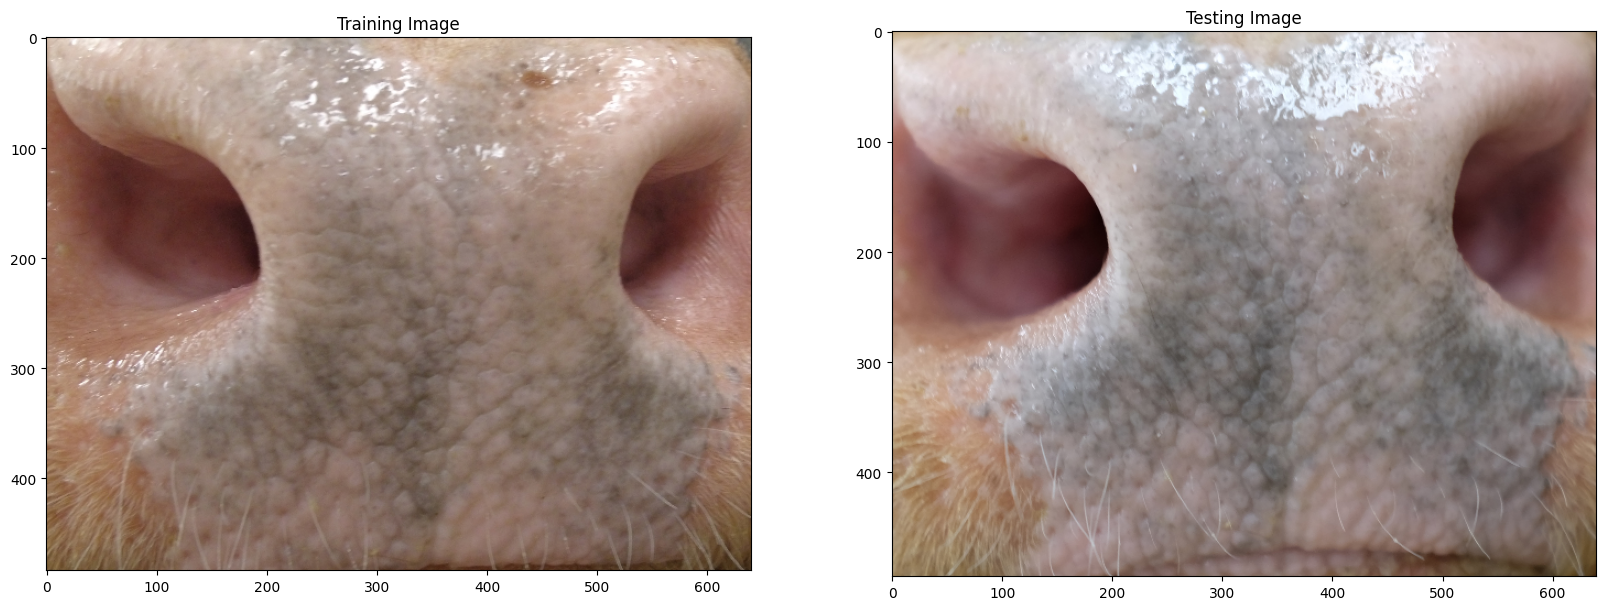

In [125]:
# Load the image
image1 = cv2.imread('./tests/cattle_0600_DJI_0147.jpg')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Resize the image with width of 640 and automatic height
image1 = cv2.resize(image1, (640, int(640*image1.shape[0]/image1.shape[1])))

# Convert the training image to RGB
training_image = image1

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Load the test image
test_image = cv2.imread('./tests/cattle_0600_DSCF3920.jpg')

test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Resize the test image with width of 640 and automatic height  
test_image = cv2.resize(test_image, (640, int(640*test_image.shape[0]/test_image.shape[1])))

# # Create test image by adding Scale Invariance and Rotational Invariance
# test_image = cv2.pyrDown(test_image)
# test_image = cv2.pyrDown(test_image)
# num_rows, num_cols = test_image.shape[:2]

# rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
# test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

## Detect keypoints and Create Descriptor

Number of Keypoints Detected In The Training Image:  412
Number of Keypoints Detected In The Query Image:  521


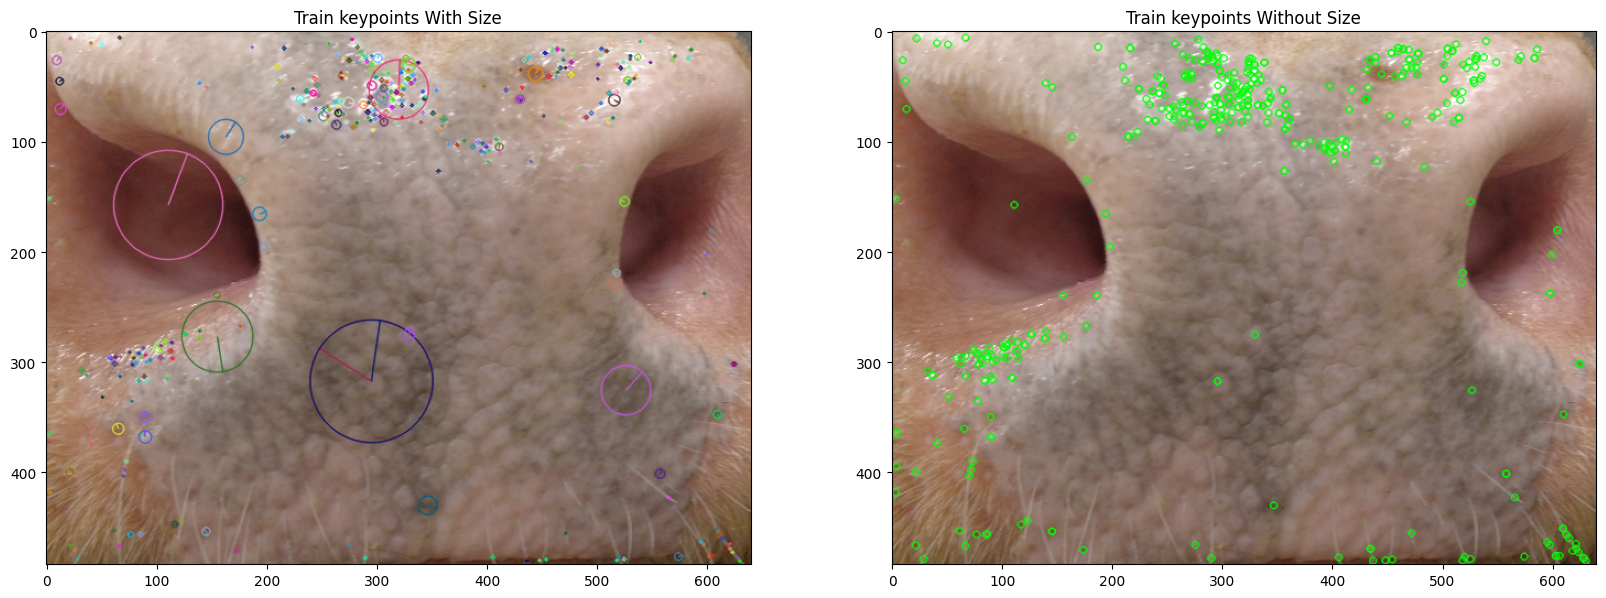

In [126]:
sift = cv2.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

## Matching Keypoints

[[29.  3.  0. ...  0.  0.  0.]
 [22. 13.  1. ...  0.  0.  0.]
 [ 6. 10. 44. ...  0.  0. 21.]
 ...
 [68.  9.  1. ... 21.  0.  1.]
 [55.  2.  1. ...  1.  1.  6.]
 [56.  9.  2. ... 15.  1.  0.]]


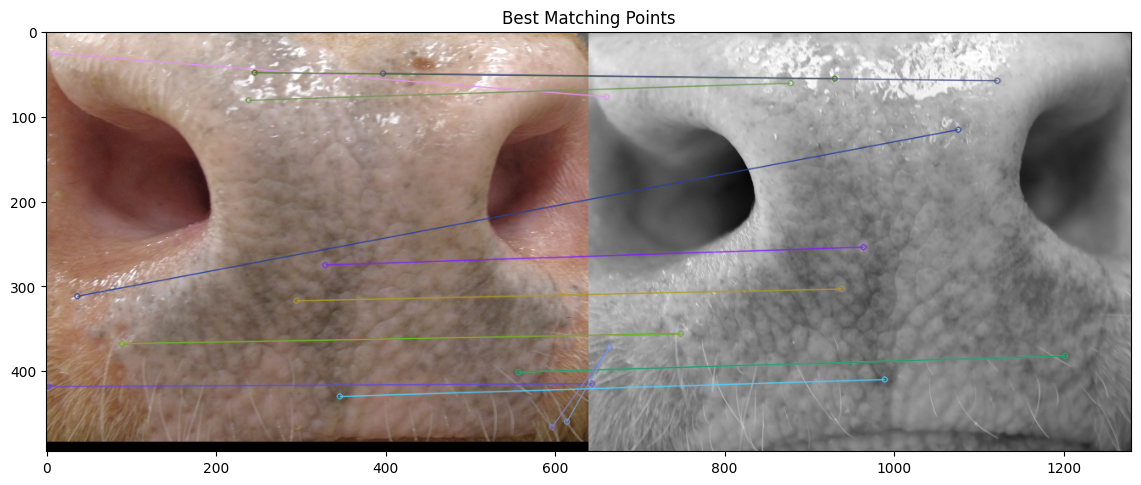


Number of Good Matching Keypoints Between The Training and Query Images:  15


In [128]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

print(train_descriptor)

# Apply knn matching
matches = bf.knnMatch(train_descriptor,test_descriptor,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# Plot keypoints
result = cv2.drawMatchesKnn(training_image, train_keypoints, test_gray, test_keypoints, good, test_gray, flags=2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Good Matching Keypoints Between The Training and Query Images: ", len(good))

# # Percentage of good matching points
# percentage_similarity = (len(good) / len(train_keypoints)) * 100

# # Print 2 decimal places
# print("Percentage of Good Matching Keypoints: {:.2f}%".format(percentage_similarity))

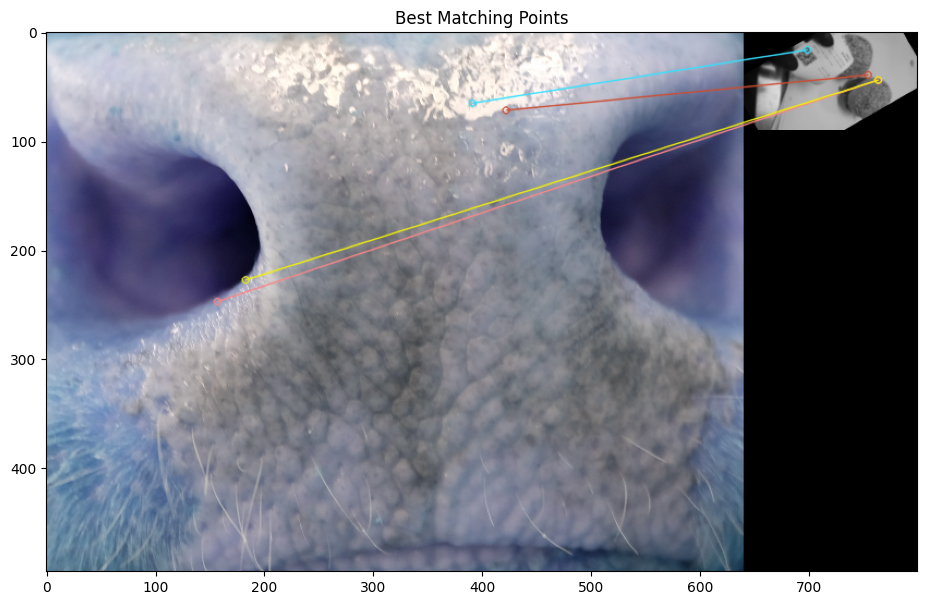


Number of Good Matching Keypoints Between The Training and Query Images:  4
Percentage of Good Matching Keypoints: 0.68


In [65]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

# Only keep the best matches
good_matches = matches[:1000]  # Adjust this value as needed

# Extract location of good matches
points1 = np.zeros((len(good_matches), 2), dtype=np.float32)
points2 = np.zeros((len(good_matches), 2), dtype=np.float32)

for i, match in enumerate(good_matches):
    points1[i, :] = train_keypoints[match.queryIdx].pt
    points2[i, :] = test_keypoints[match.trainIdx].pt

# Find homography
_, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

# Use this mask to eliminate outliers
matches_mask = mask.ravel().tolist()

# Draw matches
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matches_mask, # draw only inliers
                   flags = 2)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, good_matches, None, **draw_params)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Good Matching Keypoints Between The Training and Query Images: ", len(good_matches))

# Percentage of good matching points
percentage_similarity = (len(good_matches) / len(train_keypoints)) * 100
print("Percentage of Good Matching Keypoints: ", percentage_similarity)

# SURF

In [ ]:
cv2.knnm